In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('../cleaned_data.csv', index_col=0)

In [3]:
df.head()

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = df.drop('target', axis=1)

In [5]:
y = df['target']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

##### X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

##### logreg = LogisticRegression()

##### logreg.fit(X_train, y_train)

##### y_pred = logreg.predict(X_test)

##### print(confusion_matrix(y_test, y_pred))


##### print(classification_report(y_test, y_pred))

In [7]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

In [8]:
y_pred = lr.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1251    0]
 [   2 1185]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1251
           p       1.00      1.00      1.00      1187

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [10]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = []


for l in range(1,10):
    lr = LogisticRegression(C=l/10, solver='lbfgs')
    scores = cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

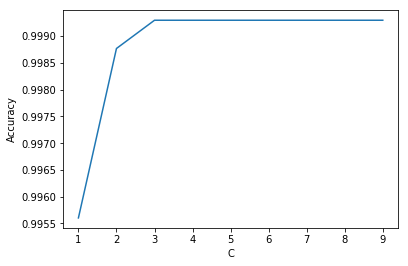

In [12]:
plt.plot(range(1,10), cv_scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv = 10)
print(scores)

[0.74907749 1.         0.99876999 1.         0.99384994 0.99876999
 1.         1.         0.76448829 1.        ]


In [14]:
scores.mean()

0.950495569074063

In [15]:
from profilehooks import profile

@profile(immediate=True)
def predict_model():
    y_pred = lr.predict(X_test)

predict_model()


*** PROFILER RESULTS ***
predict_model (<ipython-input-15-b05ac1083467>:3)
function called 1 times

         5 function calls in 0.000 seconds

   Ordered by: cumulative time, internal time, call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-15-b05ac1083467>:3(predict_model)
        1    0.000    0.000    0.000    0.000 base.py:268(predict)
        1    0.000    0.000    0.000    0.000 base.py:235(decision_function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        0    0.000             0.000          profile:0(profiler)




NotFittedError: This LogisticRegression instance is not fitted yet